# An application of the Bayes Theorem

The Bayes Theorem can be used to update our degree of belief on an hypothesis. The degree of belief is given in probabilistic terms that, by definition, can only be subjective. Despite that, it is possible to draw *objective* conclusions from repeated experiments and it turns out that they are independent of the choice of the initial guess.

Let's do the following experiment: we hava a urn with six balls of different colors (say red, green and blue). We know nothing about its content, but we want to try to guess how many red balls are inside it extracting just one ball from the urn each time.

From the point of view of a physicist, each ball represents the result of an experiment, affected by random effects. Repeating the same measurements many times, we can more and more trust our experiment, because, thanks to the Bayes Theorem, after each experiment we can update our confidence on the result by updating the corresponding probability.

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# choose any distribution of balls
urn = ['R' ,'R', 'R', 'G', 'G', 'B']

According to Bayes, we can estimate the probability $P(H|x)$ that the red balls are distributed according to $H$, when the result of a draw is $x$. This is called the *posterior* probability (because it is estimated *after* an experiment) and is given by

$P(H|x) = \frac{P(H)P(x|H)}{P(x)}$,

where $P(H)$ is the (subjective) *prior* attributed to the hypothesis $H$, $P(x|H)$ is the probability of drawing a ball of type $x$, given $H$. Such a probability is called the *likelihood* because it tells us how likely is the result $x$, given the hypothesis $H$. The prior $P(x)$ represents the probability of drawing a $x$ irrespective of the distribution of the balls. Indeed, it acts as a normalisation factor, so it can be computed by imposing the normalisation condition.

Given that the number of balls in the urn is 6, there are seven possible hypotheses:

1. no ball is red : $P(R|H_0)=0$
2. one ball is red: $P(R|H_1) = \frac{1}{6}$
3. two balls are red: $P(R|H_2) = \frac{2}{6}=\frac{1}{3}$
4. three balls are red: $P(R|H_3) = \frac{3}{6}=\frac{1}{2}$
5. four balls are red: $P(R|H_4) = \frac{4}{6}=\frac{2}{3}$
6. five balls are red: $P(R|H_5) = \frac{5}{6}$
7. all the balls are red: $P(R|H_6) = 1$.

A first guess could be that $P(H) = 1/7$, i.e., all the hypothesis have the same probability

Ball thrown: G
Hypothesis Prior Likelihood Numerator Posterior
         0  0.14       0.00      0.00      0.29
         1  0.14       0.00      0.14      0.24
         2  0.14       0.00      0.12      0.19
         3  0.14       0.00      0.10      0.14
         4  0.14       0.00      0.07      0.10
         5  0.14       0.00      0.05      0.05
         6  0.14       0.00      0.02      0.00
            1.00                           1.00


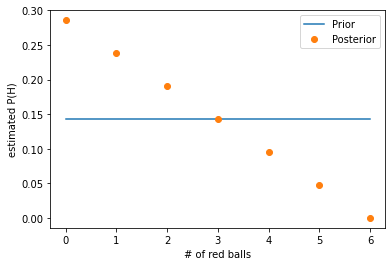

In [182]:
Likelihood = [0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
# change the following prior to find what happens if you choose it
# arbitrarily
Prior = [1/7]*len(Likelihood)

ball = urn[np.random.randint(0,6)]
print(f'Ball thrown: {ball}')
print('Hypothesis Prior Likelihood Numerator Posterior')

updatedProbability = []

# the following line is needed in jupyter notebooks to make the plot to appear
%matplotlib inline

def updateProbability(Likelihood, Prior, verbose = True, plot = True):
    if not verbose:
        plot = False
    Px = 0
    BayesNumerator = [0]*len(Likelihood)
    Posterior = [0]*len(Likelihood)
    for nH in range(len(Likelihood)):
        PRH = Likelihood[nH]
        if ball != 'R':
            PRH = 1 - PRH
        BayesNumerator[nH] = Prior[nH]*PRH
        Px += BayesNumerator[nH]

    sumPrior = 0
    sumPosterior = 0
    for nH in range(len(Likelihood)):
        Posterior[nH] = BayesNumerator[nH]/Px
        sumPosterior += Posterior[nH]
        sumPrior += Prior[nH]
        if verbose:
            print(f'{nH:10} {Prior[nH]:5.2f} {PRH:10.2f} ' +
                  f'{BayesNumerator[nH-1]:9.2f} {Posterior[nH]:9.2f}')
    if verbose:
        print(f'{sumPrior:16.2f} {sumPosterior:30.2f}')
    if plot:
        plt.plot(range(0,7,1), Prior, '-', label = 'Prior')
        plt.plot(range(0,7,1), Posterior, 'o', label = 'Posterior')
        plt.xlabel('# of red balls')
        plt.ylabel('estimated P(H)')
        plt.legend()
        plt.show()
    return Posterior
        
Posterior = updateProbability(Likelihood, Prior)
updatedProbability.append(Posterior)

Now that we updated our estimated probability, we can treat the posterior as our new prior and make another experiment

Ball thrown: G
Hypothesis Prior Likelihood Numerator Posterior
         0  0.29       0.00      0.00      0.40
         1  0.24       0.00      0.29      0.27
         2  0.19       0.00      0.20      0.18
         3  0.14       0.00      0.13      0.10
         4  0.10       0.00      0.07      0.04
         5  0.05       0.00      0.03      0.01
         6  0.00       0.00      0.01      0.00
            1.00                           1.00


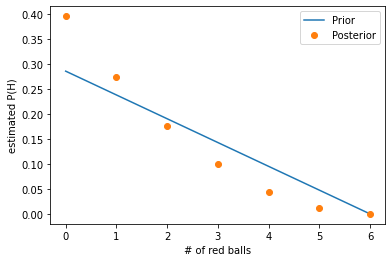

In [183]:
Prior = Posterior
ball = urn[np.random.randint(0,6)]
print(f'Ball thrown: {ball}')
print('Hypothesis Prior Likelihood Numerator Posterior')
Posterior = updateProbability(Likelihood, Prior)
updatedProbability.append(Posterior)

Let's iterate

Ball thrown: G
Hypothesis Prior Likelihood Numerator Posterior
         0  0.40       0.00      0.00      0.49
         1  0.27       0.00      0.40      0.28
         2  0.18       0.00      0.23      0.15
         3  0.10       0.00      0.12      0.06
         4  0.04       0.00      0.05      0.02
         5  0.01       0.00      0.01      0.00
         6  0.00       0.00      0.00      0.00
            1.00                           1.00


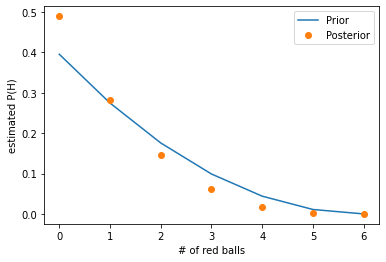

Ball thrown: B
Hypothesis Prior Likelihood Numerator Posterior
         0  0.49       0.00      0.00      0.57
         1  0.28       0.00      0.49      0.27
         2  0.15       0.00      0.24      0.11
         3  0.06       0.00      0.10      0.04
         4  0.02       0.00      0.03      0.01
         5  0.00       0.00      0.01      0.00
         6  0.00       0.00      0.00      0.00
            1.00                           1.00


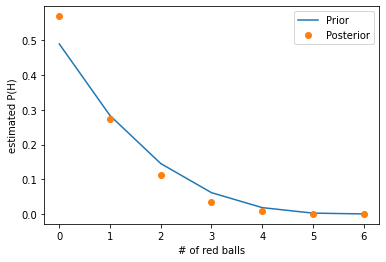

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.57       1.00      0.00      0.00
         1  0.27       1.00      0.00      0.43
         2  0.11       1.00      0.05      0.35
         3  0.04       1.00      0.04      0.17
         4  0.01       1.00      0.02      0.04
         5  0.00       1.00      0.00      0.00
         6  0.00       1.00      0.00      0.00
            1.00                           1.00


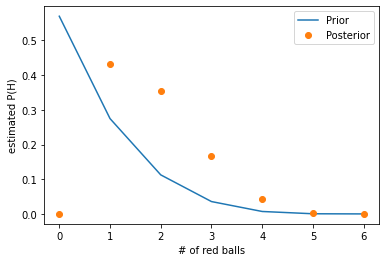

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       1.00      0.00      0.00
         1  0.43       1.00      0.00      0.24
         2  0.35       1.00      0.07      0.39
         3  0.17       1.00      0.12      0.27
         4  0.04       1.00      0.08      0.10
         5  0.00       1.00      0.03      0.01
         6  0.00       1.00      0.00      0.00
            1.00                           1.00


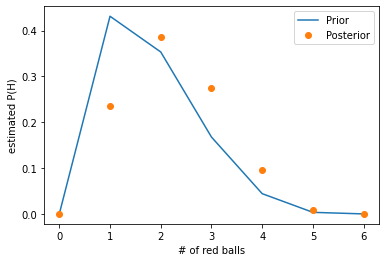

Ball thrown: R
Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       1.00      0.00      0.00
         1  0.24       1.00      0.00      0.10
         2  0.39       1.00      0.04      0.34
         3  0.27       1.00      0.13      0.36
         4  0.10       1.00      0.14      0.17
         5  0.01       1.00      0.06      0.02
         6  0.00       1.00      0.01      0.00
            1.00                           1.00


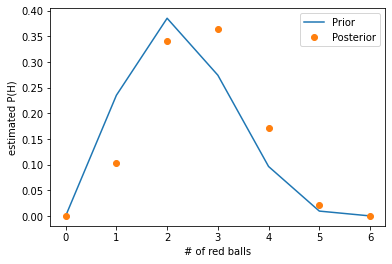

In [184]:
for i in range(5):
    Prior = Posterior
    ball = urn[np.random.randint(0,6)]
    print(f'Ball thrown: {ball}')
    print('Hypothesis Prior Likelihood Numerator Posterior')
    Posterior = updateProbability(Likelihood, Prior)
    updatedProbability.append(Posterior)

Let's iterate even more

Hypothesis Prior Likelihood Numerator Posterior
         0  0.00       0.00      0.00      0.00
         1  0.00       0.00      0.00      0.00
         2  0.00       0.00      0.00      0.00
         3  1.00       0.00      0.00      1.00
         4  0.00       0.00      0.50      0.00
         5  0.00       0.00      0.00      0.00
         6  0.00       0.00      0.00      0.00
            1.00                           1.00


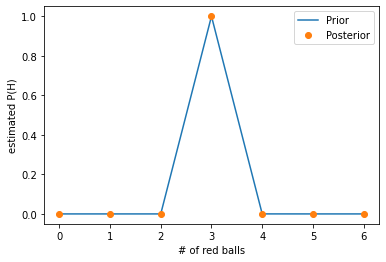

In [185]:
for i in range(200):
    Prior = Posterior
    ball = urn[np.random.randint(0,6)]
    Posterior = updateProbability(Likelihood, Prior, verbose = False)
    updatedProbability.append(Posterior)
    
print('Hypothesis Prior Likelihood Numerator Posterior')
Prior = Posterior
ball = urn[np.random.randint(0,6)]
Posterior = updateProbability(Likelihood, Prior)
updatedProbability.append(Posterior)

We can see how the probability evolve with time using animation.

`%matplotlib notebook` is needed to let a python notebook to show an animated plot.

<IPython.core.display.Javascript object>


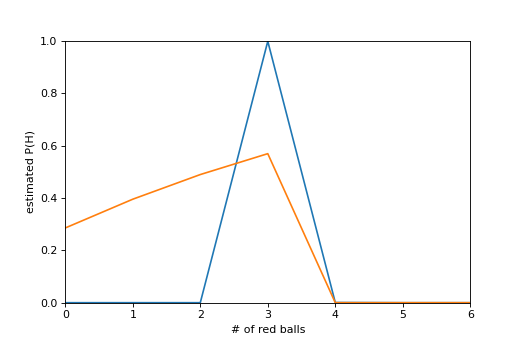

In [201]:
%matplotlib notebook

# obatin the details of a plot (returns a figure and its axes)
fig, ax = plt.subplots()

# obtain the line to be plotted (void initially)
line, = ax.plot([])

# set a fixed window
ax.set_ylim(0, 1)
ax.set_xlim(0, 6)

def animate(frame_num):
    y = updatedProbability[frame_num]
    # update the line
    line.set_data((range(0, 7, 1), y))
    plt.xlabel('# of red balls')
    plt.ylabel('estimated P(H)')
    plt.show()

    return line

anim = FuncAnimation(fig, animate, frames=len(updatedProbability), interval=20)
plt.show()

Note that the posterior probability, after a large enough number of trials, tend to the objective probability irrespective of the prior chosen at the beginning and in agreement with what predicted by the frequentist approach.

Let's look at how the posterior probability for each hypothesis evolve with time.

<IPython.core.display.Javascript object>


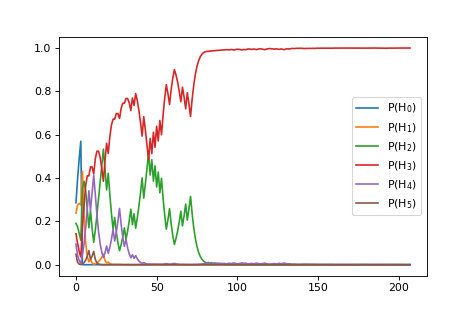

In [208]:
p = []
for i in range(0, len(urn)):
    p.append([updatedProbability[j][i] for j in range(len(updatedProbability))])

for i in range(len(urn)):
    plt.plot(range(len(updatedProbability)), p[i], '-', 
             label = f'P(H$_{i}$)')
plt.legend()
plt.show()